 # <center>  LAB7 - Kwadratury adaptacyjne </center>
# <center>  Gosztyła Mikołaj, Smółka Antoni </center> 

# Kwadratury adaptacyjne

## Zadanie 1
Oblicz wartość całki z poprzedniego laboratorium:

$$ \int_0^1 \frac{4}{1 + x^2} \, dx, $$

korzystając z:
- (a) kwadratur adaptacyjnych trapezów,
- (b) kwadratur adaptacyjnych Gaussa-Kronroda.

Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej. Wyniki dodaj do wykresu uzyskanego w poprzednim laboratorium. Przydatna będzie funkcja `scipy.integrate.quad_vec`. Na liczbę ewaluacji funkcji podcałkowej można wpływać pośrednio, zmieniając wartość dopuszczalnego błędu (tolerancji). Przyjmij wartości tolerancji z zakresu od 100 do \(10^{-14}\). Liczba ewalulacji funkcji podcałkowej zwracana jest w zmiennej `info['neval']`.

## Zadanie 2
Powtórz obliczenia z poprzedniego oraz dzisiejszego laboratorium dla całek:

- (a) $$ \int_0^1 \sqrt{x \log x} \, dx = -\frac{4}{9}, $$
- (b) $$ \int_0^1 \left(\frac{1}{(x-0.3)^2 + a} + \frac{1}{(x-0.9)^2 + b} - 6\right) \, dx, $$

We wzorze (b) przyjmij \( a = 0.001 \) oraz \( b = 0.004 \). Błąd kwadratury dla całki (b) oblicz, wykorzystując fakt, że:

$$ \int_0^1 \frac{1}{(x-x0)^2 + a} \, dx = \frac{1}{\sqrt{a}} \left( \arctan \left(\frac{1-x0}{\sqrt{a}}\right) + \arctan \left(\frac{x0}{\sqrt{a}}\right) \right), $$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import trapezoid, simpson

# Zadanie 1

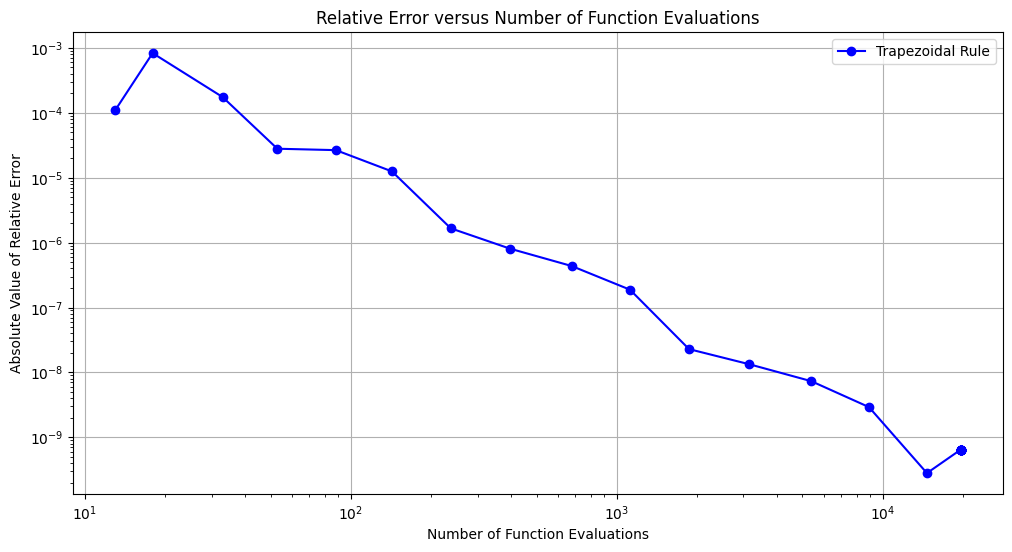

In [2]:
def f(x):
    return 4 / (1 + x**2)

true_value = np.pi
tolerances = np.logspace(-1, -14, 30)

errors_trapezoidal = []
evaluations_trapezoidal = []

for tol in tolerances:
    result, err, info = integrate.quad_vec(f, 0, 1, epsabs=tol, full_output=True, quadrature='trapezoid')
    error = np.abs((result - true_value) / true_value)
    errors_trapezoidal.append(error)
    evaluations_trapezoidal.append(info.neval)

plt.figure(figsize=(12, 6))
plt.loglog(evaluations_trapezoidal, errors_trapezoidal, 'bo-', label='Trapezoidal Rule')
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Absolute Value of Relative Error')
plt.title('Relative Error versus Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
errors_gauss_kronrod = []
evaluations_gauss_kronrod = []

for tol in tolerances:
    result, err, info = integrate.quad_vec(f, 0, 1, epsabs=tol, full_output=True)
    error = np.abs((result - true_value) / true_value)
    errors_gauss_kronrod.append(error)
    evaluations_gauss_kronrod.append(info.neval)

print(errors_gauss_kronrod)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


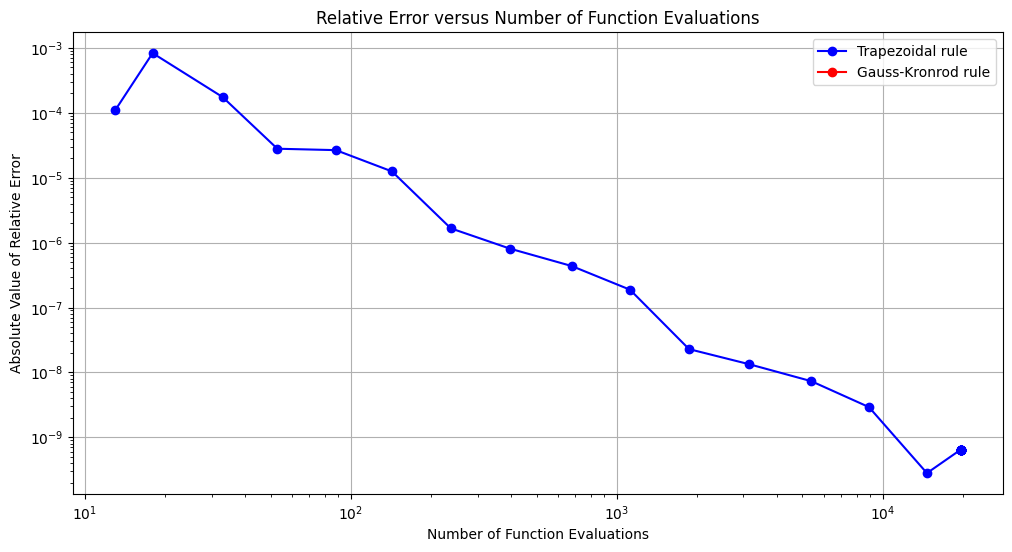

In [4]:
plt.figure(figsize=(12, 6))
plt.loglog(evaluations_trapezoidal, errors_trapezoidal, 'bo-', label='Trapezoidal rule')
plt.loglog(evaluations_gauss_kronrod, errors_gauss_kronrod, 'ro-', label='Gauss-Kronrod rule')
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Absolute Value of Relative Error')
plt.title('Relative Error versus Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()

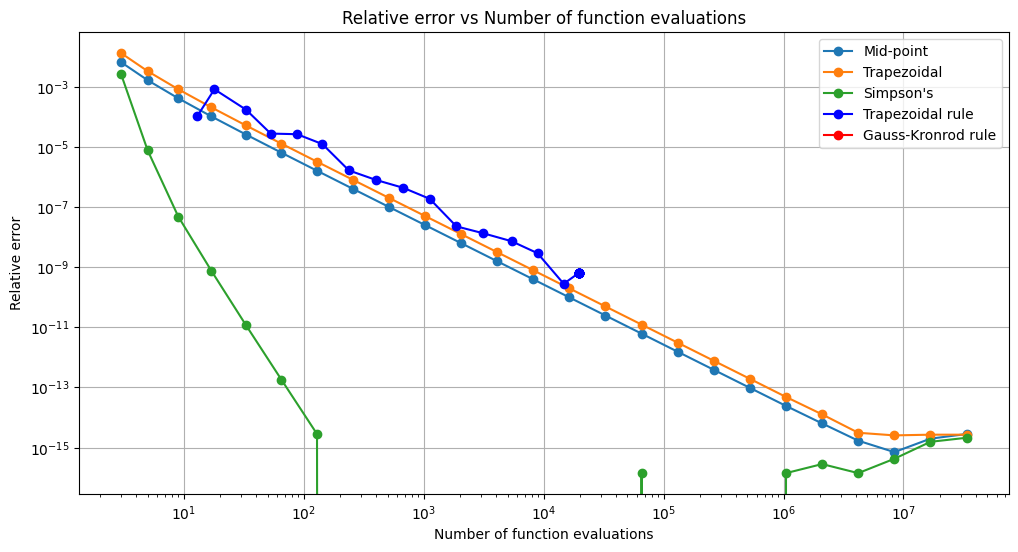

In [5]:
def mid_point_rule(y, x):
    midpoints = (x[:-1] + x[1:]) / 2
    widths = x[1:] - x[:-1]
    return np.sum(f(midpoints) * widths)  
    
def calculate_integral_error(method, m):
    errors = []
    for i in range(1, m+1):
        n = 2**i + 1
        x = np.linspace(0, 1, n)
        y = f(x)
        integral = method(y, x=x)
        error = np.abs((integral - true_value) / true_value)
        errors.append(error)
    return errors

m_values = 2**np.arange(1, 26) + 1
errors_midpoint = calculate_integral_error(mid_point_rule, 25)
errors_trapezoidal2 = calculate_integral_error(trapezoid, 25)
errors_simpson = calculate_integral_error(simpson, 25)

plt.figure(figsize=(12, 6))
plt.loglog(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.loglog(m_values, errors_trapezoidal2, label='Trapezoidal', marker='o')
plt.loglog(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.loglog(evaluations_trapezoidal, errors_trapezoidal, 'bo-', label='Trapezoidal rule')
plt.loglog(evaluations_gauss_kronrod, errors_gauss_kronrod, 'ro-', label='Gauss-Kronrod rule')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 2
## a)

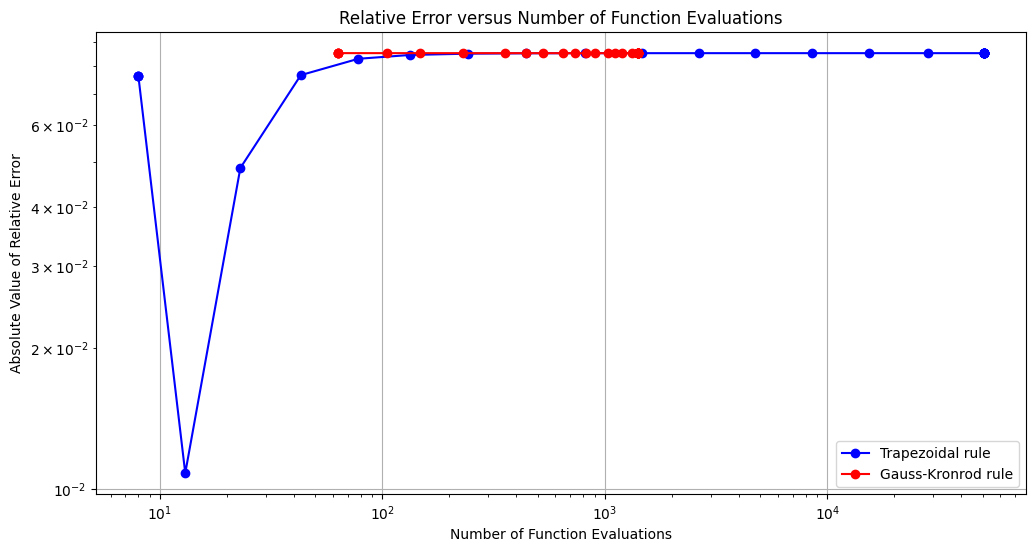

In [6]:
def f_a(x):
    if x == 0: return 0
    return -np.sqrt(-x * np.log(x))

true_value_a = -4/9
tolerances = np.logspace(1, -14, 30)

errors_trapezoidal_f_a = []
evaluations_trapezoidal_f_a  = []

for tol in tolerances:
    result, err, info = integrate.quad_vec(f_a, 0, 1, epsabs=tol, full_output=True, quadrature='trapezoid')
    error = np.abs((result - true_value_a) / true_value_a)
    errors_trapezoidal_f_a .append(error)
    evaluations_trapezoidal_f_a .append(info.neval)

errors_gauss_kronrod_f_a  = []
evaluations_gauss_kronrod_f_a  = []

for tol in tolerances:
    result, err, info = integrate.quad_vec(f_a, 0, 1, epsabs=tol, full_output=True)
    error = np.abs((result - true_value_a) / true_value_a)
    errors_gauss_kronrod_f_a .append(error)
    evaluations_gauss_kronrod_f_a .append(info.neval)

plt.figure(figsize=(12, 6))
plt.loglog(evaluations_trapezoidal_f_a, errors_trapezoidal_f_a, 'bo-', label='Trapezoidal rule')
plt.loglog(evaluations_gauss_kronrod_f_a, errors_gauss_kronrod_f_a, 'ro-', label='Gauss-Kronrod rule')
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Absolute Value of Relative Error')
plt.title('Relative Error versus Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()

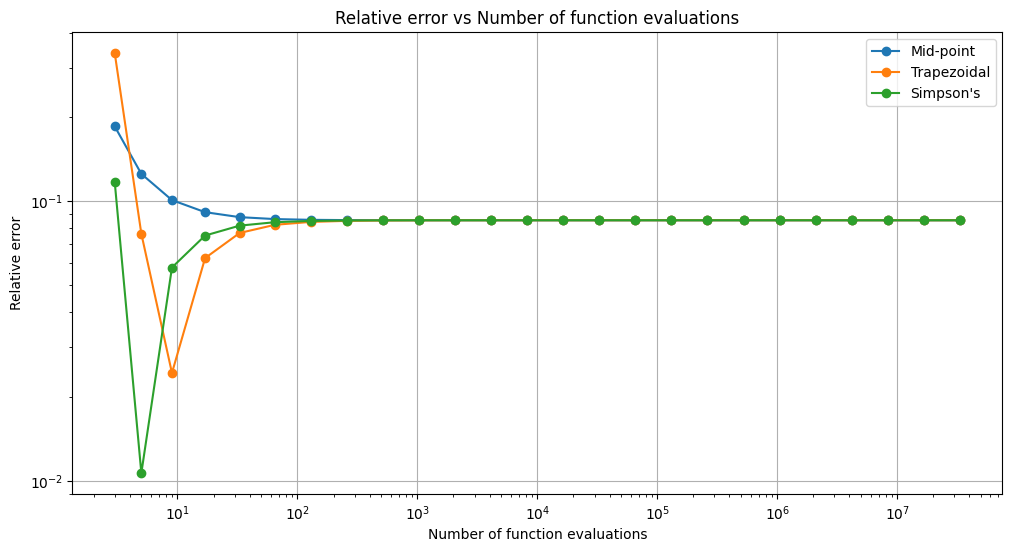

In [7]:
def f_a(x):
    x_safe = np.where(x == 0, np.finfo(float).eps, x)
    return -np.sqrt(-x_safe * np.log(x_safe))

def mid_point_rule(y, x):
    midpoints = (x[:-1] + x[1:]) / 2
    widths = x[1:] - x[:-1]
    return np.sum(f_a(midpoints) * widths)  
    
def calculate_integral_error(method, m, function):
    errors = []
    for i in range(1, m+1):
        n = 2**i + 1
        x = np.linspace(0, 1, n)
        y = function(x)
        integral = method(y, x=x)
        error = np.abs((integral - true_value_a) / true_value_a)
        errors.append(error)
    return errors

m_values = 2**np.arange(1, 26) + 1
errors_midpoint = calculate_integral_error(mid_point_rule, 25, f_a)
errors_trapezoidal = calculate_integral_error(trapezoid, 25, f_a)
errors_simpson = calculate_integral_error(simpson, 25, f_a)

plt.figure(figsize=(12, 6))
plt.loglog(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.loglog(m_values, errors_trapezoidal, label='Trapezoidal', marker='o')
plt.loglog(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()

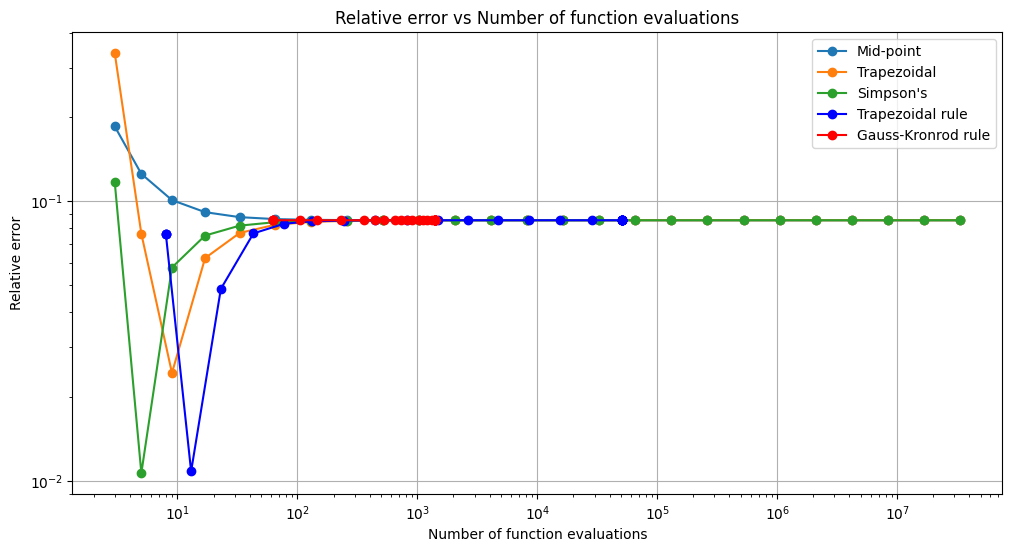

In [8]:
plt.figure(figsize=(12, 6))
plt.loglog(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.loglog(m_values, errors_trapezoidal, label='Trapezoidal', marker='o')
plt.loglog(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.loglog(evaluations_trapezoidal_f_a, errors_trapezoidal_f_a, 'bo-', label='Trapezoidal rule')
plt.loglog(evaluations_gauss_kronrod_f_a, errors_gauss_kronrod_f_a, 'ro-', label='Gauss-Kronrod rule')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()



#porównanie do poprawy, dokłądność powinna rosnąć 

In [9]:
def calculate_hmin(method, true_value):
    h = 1.0
    previous_error = 1.0

    while True:
        n = int(1 / h) + 1
        x = np.linspace(0, 1, n)
        y = f_a(x)
        if method == '':
            result, err, info = integrate.quad_vec(f_a, 0, 1, epsabs=h, full_output=True)
        else:
            result, err, info = integrate.quad_vec(f_a, 0, 1, epsabs=h, full_output=True, quadrature=method)
        error = np.abs((result - true_value) / true_value)

        if error >= previous_error or np.isnan(error):
            break

        previous_error = error
        h /= 2

    return h

h_min_trapezoidal = calculate_hmin('trapezoid', true_value_a)
print("h_min for Trapezoidal method is:", h_min_trapezoidal)

h_min_gauss = calculate_hmin('', true_value_a)
print("h_min for Gauss-Kronrod's method is:", h_min_gauss)

h_min for Trapezoidal method is: 0.5
h_min for Gauss-Kronrod's method is: 0.5


## b)

In [10]:
a = 0.001
b = 0.004

def f(x):
    return 1/((x - 0.3)**2 + a) + 1/((x - 0.9)**2 + b) - 6

def true_f(x0, a2):
    return (1/np.sqrt(a2)) * (np.arctan((1 - x0)/np.sqrt(a2)) + np.arctan(x0/np.sqrt(a2)))

true_value = true_f(0.3, a) + true_f(0.9, b) - 6

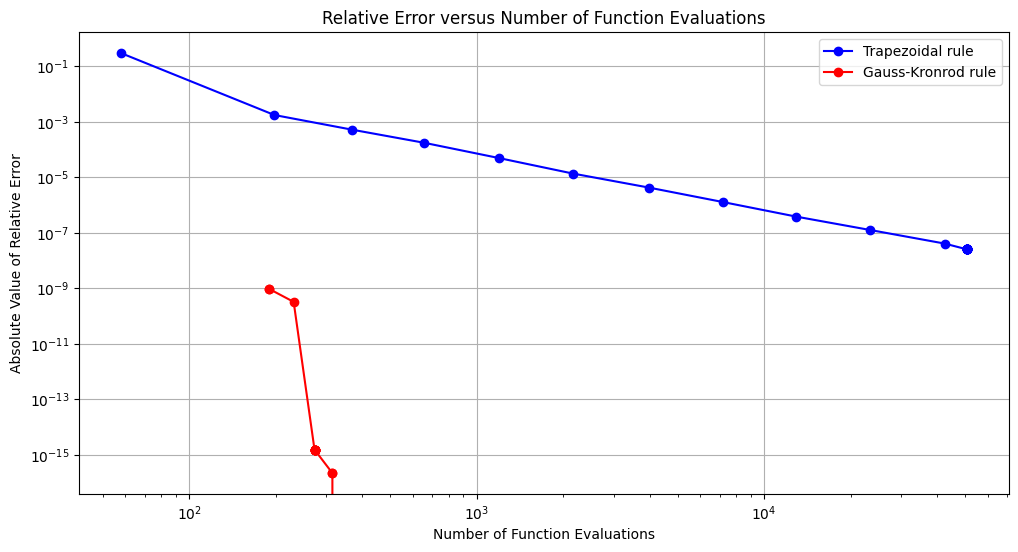

In [11]:
errors_trapezoidal_f = []
evaluations_trapezoidal_f  = []

for tol in tolerances:
    result, err, info = integrate.quad_vec(f, 0, 1, epsabs=tol, full_output=True, quadrature='trapezoid')
    error = np.abs((result - true_value) / true_value)
    errors_trapezoidal_f .append(error)
    evaluations_trapezoidal_f .append(info.neval)

errors_gauss_kronrod_f  = []
evaluations_gauss_kronrod_f  = []

for tol in tolerances:
    result, err, info = integrate.quad_vec(f, 0, 1, epsabs=tol, full_output=True)
    error = np.abs((result - true_value) / true_value)
    errors_gauss_kronrod_f .append(error)
    evaluations_gauss_kronrod_f .append(info.neval)

plt.figure(figsize=(12, 6))
plt.loglog(evaluations_trapezoidal_f, errors_trapezoidal_f, 'bo-', label='Trapezoidal rule')
plt.loglog(evaluations_gauss_kronrod_f, errors_gauss_kronrod_f, 'ro-', label='Gauss-Kronrod rule')
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Absolute Value of Relative Error')
plt.title('Relative Error versus Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()

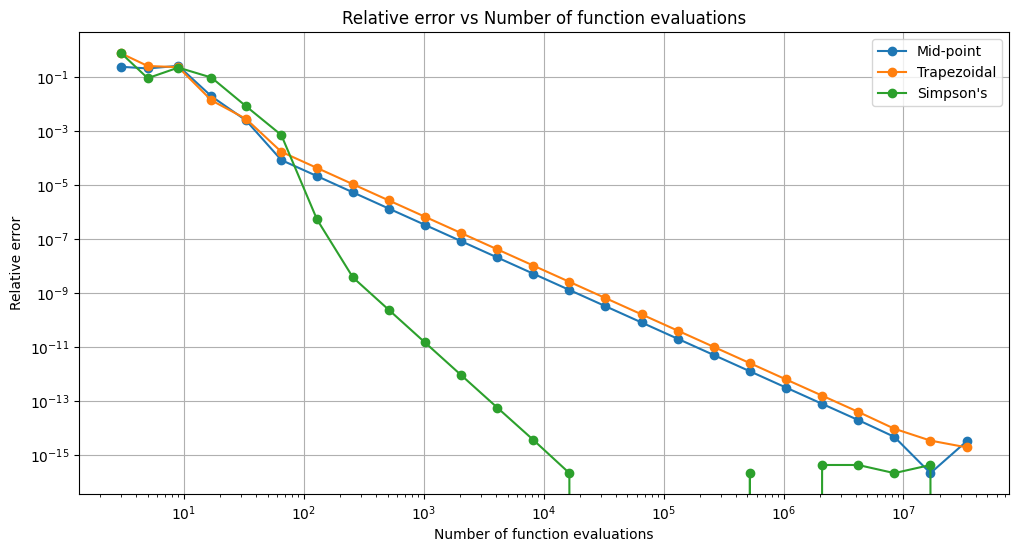

In [12]:
def mid_point_rule(y, x):
    midpoints = (x[:-1] + x[1:]) / 2
    widths = x[1:] - x[:-1]
    return np.sum(f(midpoints) * widths)  
    
def calculate_integral_error(method, m, function):
    errors = []
    for i in range(1, m+1):
        n = 2**i + 1
        x = np.linspace(0, 1, n)
        y = function(x)
        integral = method(y, x=x)
        error = np.abs((integral - true_value) / true_value)
        errors.append(error)
    return errors

m_values = 2**np.arange(1, 26) + 1
errors_midpoint = calculate_integral_error(mid_point_rule, 25, f)
errors_trapezoidal = calculate_integral_error(trapezoid, 25, f)
errors_simpson = calculate_integral_error(simpson, 25, f)

plt.figure(figsize=(12, 6))
plt.loglog(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.loglog(m_values, errors_trapezoidal, label='Trapezoidal', marker='o')
plt.loglog(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()

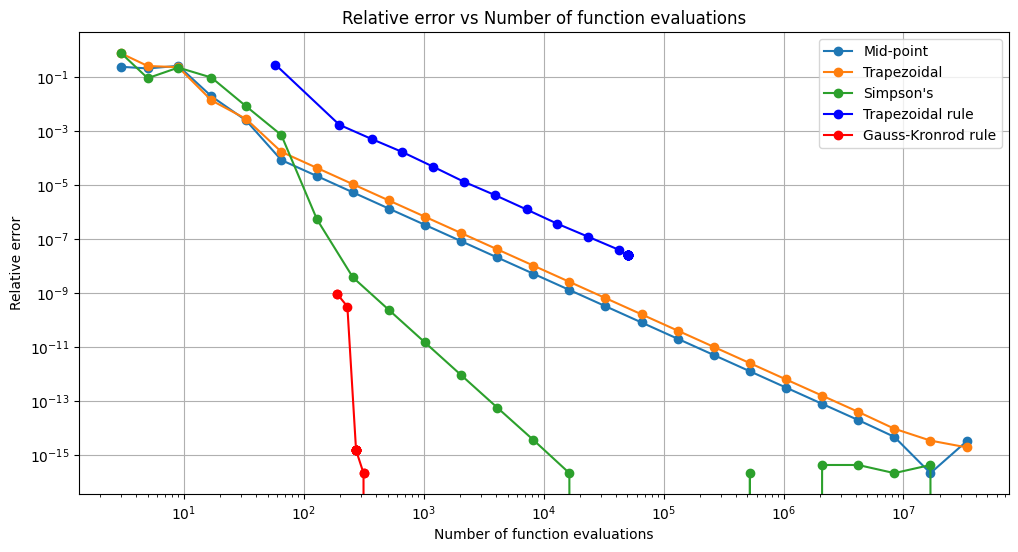

In [13]:
plt.figure(figsize=(12, 6))
plt.loglog(m_values, errors_midpoint, label='Mid-point', marker='o')
plt.loglog(m_values, errors_trapezoidal, label='Trapezoidal', marker='o')
plt.loglog(m_values, errors_simpson, label='Simpson\'s', marker='o')
plt.loglog(evaluations_trapezoidal_f, errors_trapezoidal_f, 'bo-', label='Trapezoidal rule')
plt.loglog(evaluations_gauss_kronrod_f, errors_gauss_kronrod_f, 'ro-', label='Gauss-Kronrod rule')
plt.xlabel('Number of function evaluations')
plt.ylabel('Relative error')
plt.title('Relative error vs Number of function evaluations')
plt.legend()
plt.grid(True)
plt.show()




#dodać 6 metodę(Gauss), tak żeby wszędzie było 6 metod

In [14]:
def calculate_hmin(method, true_value):
    h = 1.0
    previous_error = 1.0

    while True:
        n = int(1 / h) + 1
        x = np.linspace(0, 1, n)
        y = f(x)
        if method == '':
            result, err, info = integrate.quad_vec(f, 0, 1, epsabs=h, full_output=True)
        else:
            result, err, info = integrate.quad_vec(f, 0, 1, epsabs=h, full_output=True, quadrature=method)
        error = np.abs((result - true_value) / true_value)

        if error >= previous_error or np.isnan(error):
            break

        previous_error = error
        h /= 2

    return h

h_min_trapezoidal = calculate_hmin('trapezoid', true_value)
print("h_min for Trapezoidal method is:", h_min_trapezoidal)

h_min_gauss = calculate_hmin('', true_value)
print("h_min for Gauss-Kronrod's method is:", h_min_gauss)




#Wnioski

h_min for Trapezoidal method is: 1.52587890625e-05
h_min for Gauss-Kronrod's method is: 0.25
